In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


dirPathJuice = '/gpfsnyu/scratch/jtg374/psychrnn/savedForHPC/juiceTaskDefault/juiceTaskDefault_20231204-12-12_3_'
dirPathOrder = '/gpfsnyu/scratch/jtg374/psychrnn/savedForHPC/orderTaskDefault/orderTaskDefault_20231204-15-12_5_'


In [9]:
with np.load(os.path.join(dirPathJuice,'decodingChoice.npz')) as f:
    accuracyLR = f['accuracyLR']
    accuracyAB = f['accuracyLR']
    accuracy12 = f['accuracy12']

In [10]:
accuracyLR.shape

(400, 5)

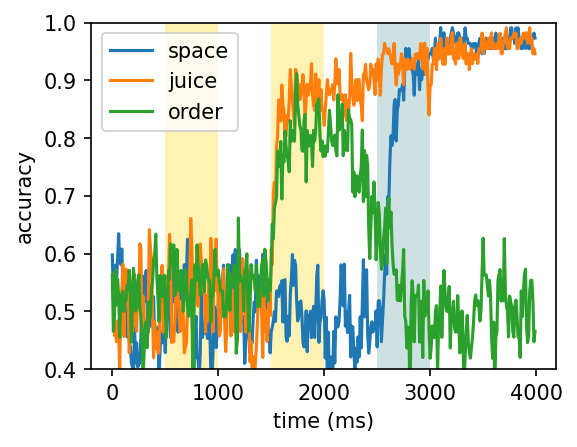

In [18]:
def plotDecodingChoice(dirPath):
    with np.load(os.path.join(dirPath,'decodingChoice.npz')) as f:
        accuracyLR = f['accuracyLR'].mean(axis=1)
        accuracyAB = f['accuracyAB'].mean(axis=1)
        accuracy12 = f['accuracy12'].mean(axis=1)
    ymin=.4
    ymax=1
    fig = plt.figure(dpi=150,figsize=(4,3))
    time = np.arange(0,4000,10)
    # plt.vlines([50,100,150,200,250,300],ymin,ymax,linestyles='dashed',label='_nolegend_')
    plt.fill_between([500,1000],0,1,color='gold',alpha=0.3,edgecolor=None)
    plt.fill_between([1500,2000],0,1,color='gold',alpha=0.3,edgecolor=None)
    plt.fill_between([2500,3000],0,1,color='cadetblue',alpha=0.3,edgecolor=None)
    plt.plot(time,accuracyLR,label='space')
    plt.plot(time,accuracyAB,label='juice')
    plt.plot(time,accuracy12,label='order')
    plt.legend()
    plt.xlabel('time (ms)')
    plt.ylabel('accuracy')
    plt.ylim(ymin,ymax)    
    return fig

fig = plotDecodingChoice(dirPathJuice)
fig.savefig('/gpfsnyu/scratch/jtg374/psychrnn/Figure/decodingChoiceJuice.pdf')

In [21]:
with np.load(os.path.join(dirPathJuice,'decodingCrossTemporal.npz')) as f:
    accuracy1A = f['accuracy1A']
    accuracy1B = f['accuracy1B']

np.diag(accuracy1A).shape

(200,)